In [33]:
import random
from citipy import citipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [34]:
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [35]:
# generate 1500 random latitude and longitude data as a list of tuples
lats = np.random.uniform(-90.0,90.0,size=1500)
lngs = np.random.uniform(-180.0,180.0,size=1500)

In [36]:
lats_lngs = zip(lats, lngs)
coordinates = list(lats_lngs)
print(coordinates[:11])

[(-55.131994120783055, 129.01754995001892), (15.012442042887926, 42.62896817759099), (-81.23817260739887, 83.73340021102922), (-25.02477331432395, 92.57225700674275), (59.02575674175131, 50.6589173257527), (-33.14635508162142, -132.45561439698628), (-77.26219356579466, 75.24741064764112), (-54.402965318440984, 135.967812170274), (-44.347414285343106, 127.7221932665289), (-67.4254917738785, 48.80239841599197), (6.812856815877112, 10.647063591303322)]


In [37]:
# use citipy module to get nearest city names
cities = list()
for coor in coordinates:
    cities_name = citipy.nearest_city(coor[0], coor[1]).city_name
    # ensure no any duplicate cities
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10], 'Generate', len(cities))

['mount gambier', 'bajil', 'busselton', 'carnarvon', 'belaya kholunitsa', 'rikitea', 'saint-philippe', 'new norfolk', 'esperance', 'east london'] Generate 605


In [38]:
# use OpenWeather API to request, get, parse JSON to retrieve weather data for each city.

# initial counters for log and sets
record_count = 1 
set_count = 1

city_data = list()
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

print('Beginning Data Retrieval     ')
print("-----------------------------")

# use enumerate() method to loop index and item simutanously 
for i, item in enumerate(cities):
    if i % 50 == 0 and i != 0 :
        record_count = 1  # initialize at every beginning of set
        set_count +=1 # increment set count
    # build URL for API call
    url = basic_url + '&q=' + item
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {item}')
    # increment record count
    record_count +=1

    try: 
        js = requests.get(url).json()
        city_name = item
        city_country = js['sys']['country']
        city_UTCdate = js['dt']
        city_date = datetime.utcfromtimestamp(city_UTCdate).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = js['coord']['lat']
        city_lon = js['coord']['lon']
        city_max_temp = js['main']['temp_max']
        city_humidity = js['main']['humidity']
        city_cload = js['clouds']['all']
        city_wind_speed = js['wind']['speed']
        # append as a list of dictionaries
        city_data.append({'City':city_name, 'Coounty':city_country, 'Date':city_date, 
                        'Lat':city_lat, 'Lng': city_lon,'Max Temp':city_max_temp,
                        'Humidity':city_humidity,'Cloudiness': city_cload,'Wind Speed':city_wind_speed})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

print(len(city_data))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount gambier
Processing Record 2 of Set 1 | bajil
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | belaya kholunitsa
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | kumbo
Processing Record 12 of Set 1 | sorland
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | kiama
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | atta

Processing Record 40 of Set 4 | champerico
Processing Record 41 of Set 4 | djibo
Processing Record 42 of Set 4 | energetik
Processing Record 43 of Set 4 | karamea
City not found. Skipping...
Processing Record 44 of Set 4 | gawler
Processing Record 45 of Set 4 | noumea
Processing Record 46 of Set 4 | along
Processing Record 47 of Set 4 | krasnoselkup
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | walajabad
City not found. Skipping...
Processing Record 50 of Set 4 | chipinge
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | carutapera
Processing Record 4 of Set 5 | port alfred
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | punta ocote
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | korla
Processing Record 10 of Set 5 | roma
Processing Record 11 of Set 5 | cidreira
Processing Record 12 of Set 5 | kavieng
Processing Recor

Processing Record 28 of Set 8 | vieques
Processing Record 29 of Set 8 | banjar
Processing Record 30 of Set 8 | yambio
Processing Record 31 of Set 8 | pisco
Processing Record 32 of Set 8 | saint anthony
Processing Record 33 of Set 8 | pitimbu
Processing Record 34 of Set 8 | grimshaw
Processing Record 35 of Set 8 | wairoa
Processing Record 36 of Set 8 | ulladulla
Processing Record 37 of Set 8 | airai
Processing Record 38 of Set 8 | san blas
Processing Record 39 of Set 8 | lembang
Processing Record 40 of Set 8 | sindou
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | atherton
Processing Record 43 of Set 8 | teknaf
Processing Record 44 of Set 8 | elmvale
Processing Record 45 of Set 8 | marapanim
Processing Record 46 of Set 8 | birao
Processing Record 47 of Set 8 | la paz
Processing Record 48 of Set 8 | sterling
Processing Record 49 of Set 8 | berlevag
Processing Record 50 of Set 8 | luwuk
Processing Record 1 of Set 9 | zaysan
Processing Record 2 of Set 9 | louis trichar

Processing Record 17 of Set 12 | guilin
Processing Record 18 of Set 12 | viadana
Processing Record 19 of Set 12 | anito
Processing Record 20 of Set 12 | egvekinot
Processing Record 21 of Set 12 | bilibino
Processing Record 22 of Set 12 | okhotsk
Processing Record 23 of Set 12 | acajutla
Processing Record 24 of Set 12 | wanderlandia
City not found. Skipping...
Processing Record 25 of Set 12 | monte san giovanni campano
Processing Record 26 of Set 12 | tahta
Processing Record 27 of Set 12 | bosobolo
Processing Record 28 of Set 12 | saurimo
Processing Record 29 of Set 12 | phetchabun
Processing Record 30 of Set 12 | sakakah
Processing Record 31 of Set 12 | baherden
Processing Record 32 of Set 12 | chuy
Processing Record 33 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 34 of Set 12 | karlskrona
Processing Record 35 of Set 12 | ahipara
Processing Record 36 of Set 12 | kirtipur
Processing Record 37 of Set 12 | makakilo city
Processing Record 38 of Set 12 | westport
Pr

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,mount gambier,AU,2022-07-04 04:11:08,-37.8333,140.7667,58.75,64,81,8.86
1,bajil,YE,2022-07-04 04:11:08,15.0584,43.2851,85.51,67,51,7.09
2,busselton,AU,2022-07-04 04:11:09,-33.6500,115.3333,62.58,56,0,22.39
3,carnarvon,AU,2022-07-04 04:11:09,-24.8667,113.6333,67.84,27,0,16.80
4,belaya kholunitsa,RU,2022-07-04 04:11:10,58.8400,50.8528,56.35,63,83,8.77
5,rikitea,PF,2022-07-04 04:11:10,-23.1203,-134.9692,75.22,71,1,14.81
6,saint-philippe,RE,2022-07-04 04:11:11,-21.3585,55.7679,69.39,71,72,15.23
7,new norfolk,AU,2022-07-04 04:11:11,-42.7826,147.0587,58.50,74,77,4.00
8,esperance,AU,2022-07-04 04:08:40,-33.8667,121.9000,59.77,48,0,15.08
9,east london,ZA,2022-07-04 04:11:12,-33.0153,27.9116,61.97,84,100,5.30


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

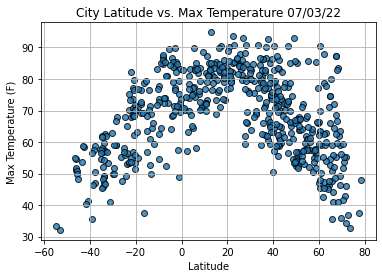

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

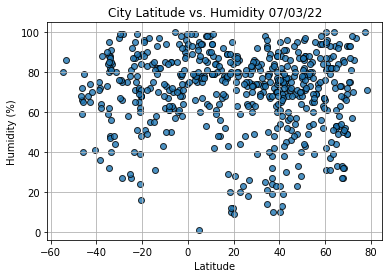

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

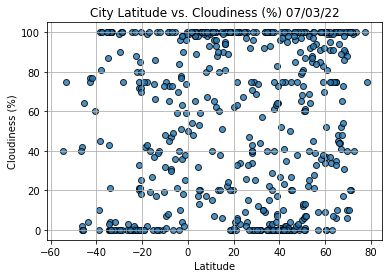

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

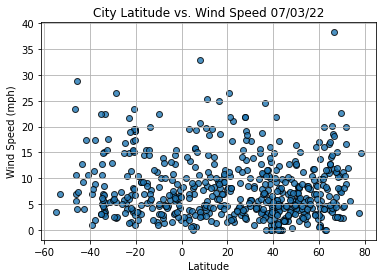

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [47]:
index13 = city_data_df.loc[13]
index13

City                      mataura
Coounty                        NZ
Date          2022-07-04 04:11:13
Lat                      -46.1927
Lng                      168.8643
Max Temp                    54.48
Humidity                       66
Cloudiness                      2
Wind Speed                   6.91
Name: 13, dtype: object

In [48]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
555    False
556     True
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,bajil,YE,2022-07-04 04:11:08,15.0584,43.2851,85.51,67,51,7.09
4,belaya kholunitsa,RU,2022-07-04 04:11:10,58.8400,50.8528,56.35,63,83,8.77
10,kumbo,CM,2022-07-04 04:11:12,6.2000,10.6667,58.12,94,100,0.63
11,sorland,NO,2022-07-04 04:11:12,67.6670,12.6934,55.26,86,100,11.27
12,cherskiy,RU,2022-07-04 04:11:13,68.7500,161.3000,61.79,52,90,2.59
...,...,...,...,...,...,...,...,...,...
554,luorong,CN,2022-07-04 04:15:28,24.4058,109.6086,86.79,74,100,3.74
556,nara,JP,2022-07-04 04:11:33,34.6851,135.8049,78.91,96,100,3.36
557,asilah,MA,2022-07-04 04:15:29,35.4650,-6.0348,66.16,87,15,1.95
558,linxia,CN,2022-07-04 04:15:30,35.6003,103.2064,78.89,40,22,3.96


In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,bajil,YE,2022-07-04 04:11:08,15.0584,43.2851,85.51,67,51,7.09
4,belaya kholunitsa,RU,2022-07-04 04:11:10,58.8400,50.8528,56.35,63,83,8.77
10,kumbo,CM,2022-07-04 04:11:12,6.2000,10.6667,58.12,94,100,0.63
11,sorland,NO,2022-07-04 04:11:12,67.6670,12.6934,55.26,86,100,11.27
12,cherskiy,RU,2022-07-04 04:11:13,68.7500,161.3000,61.79,52,90,2.59


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

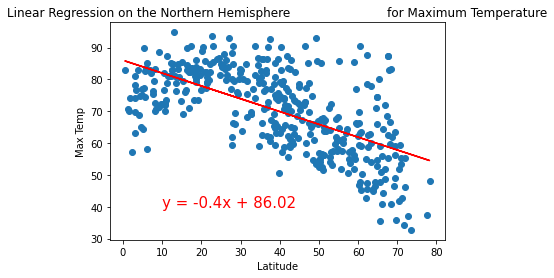

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

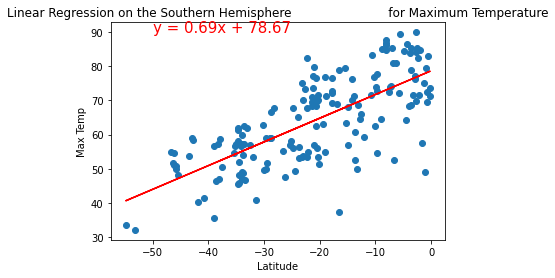

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

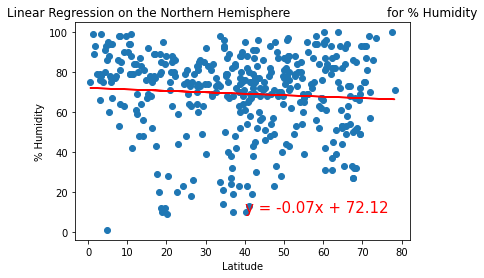

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

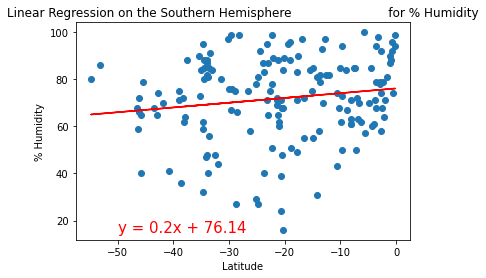

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

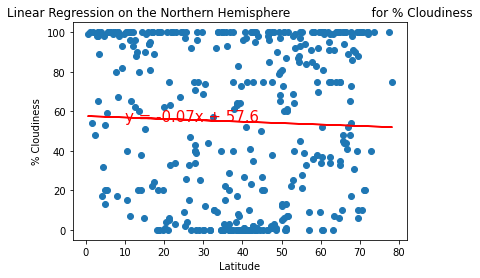

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

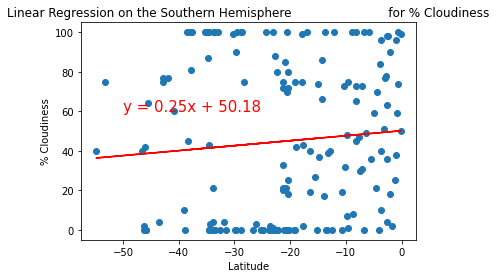

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


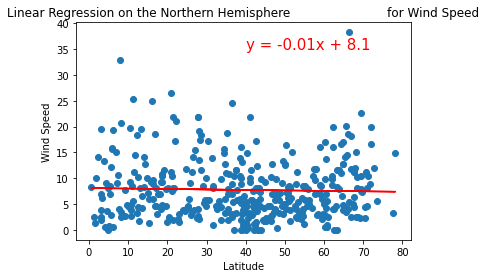

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

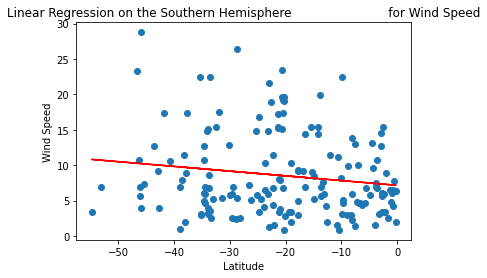

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))